In [4]:
# import os
# os.environ['KERAS_BACKEND']='tensorflow'

import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [5]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()

# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [41]:
# in order to plot in a 2D figure
encoding_dim = 3

# this is our input placeholder
input_img = Input(shape=(784,))

# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

# construct the autoencoder model
autoencoder = Model(input=input_img, output=decoded)

# construct the encoder model for plotting
encoder = Model(input=input_img, output=encoder_output)

# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# training
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)


C:\Users\BOYUAN ZHANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\BOYUAN ZHANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Epoch 1/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0718
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0570
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0501
Epoch 4/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0454
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0426
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0408
Epoch 7/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0397
Epoch 8/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0389
Epoch 9/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0382
Epoch 10/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0376
Epoch 11/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0372: 0s -
Epoch 12/20
60000/60000 [=====================

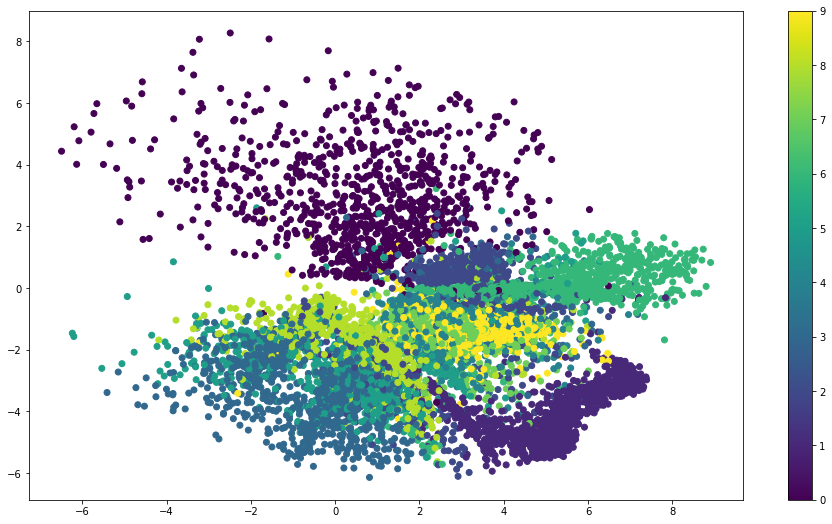

In [22]:
# plotting
encoded_imgs = encoder.predict(x_test)
plt.figure(figsize=(16,9))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()

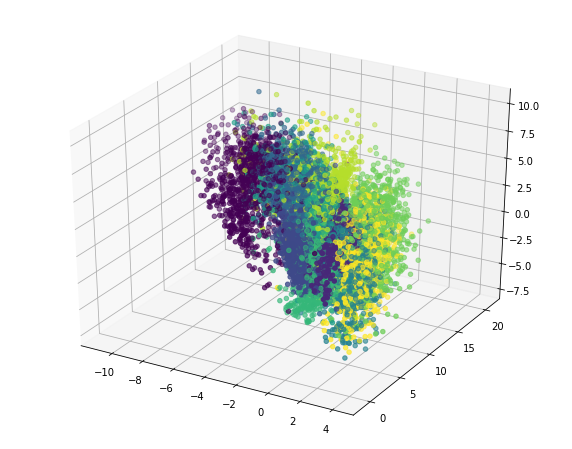

In [45]:
from mpl_toolkits.mplot3d import Axes3D
encoded_imgs = encoder.predict(x_test)
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
#ax = fig.gca(projection='3d')
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], encoded_imgs[:, 2], c=y_test)